Initiate the module we need for plots and statistics

In [14]:
import pandas as pd
import seaborn as sns
import os

import numpy as np


Let's merge all the measurment to one CSV file for each LTE network

In [2]:
# Define the main folders containing the CSV files
main_folders = ['Private Light', 'Private Full']

# Define the location folders
location_folders = ['loc1', 'loc2']

# Initialize dictionaries to hold DataFrames for each plot type
all_files = {'t-g-plot': [], 'delay-plot': []}

# Function to extract loop from filename
def extract_loop_from_filename(filename):
    parts = filename.split('-')
    loop = next((int(part[4:]) for part in parts if part.startswith('loop')), None)
    if loop is None:
        raise ValueError(f"Cannot extract loop number from filename: {filename}")
    return loop

# Iterate over each main folder (Private Light and Private Full)
for main_folder in main_folders:
    # Determine traffic type based on the main folder
    traffic = 'Full' if 'Full' in main_folder else 'Light'
    
    # Iterate over each location folder (loc1 and loc2)
    for location_folder in location_folders:
        # Iterate over each plot type (t-g-plot and delay-plot)
        for plot_type in all_files.keys():
            folder_path = os.path.join(main_folder, location_folder, plot_type)
            
            # Get the list of all CSV files in the plot type folder
            csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
    
            # Iterate over each CSV file
            for csv_file in csv_files:
                # Load the CSV file
                file_path = os.path.join(folder_path, csv_file)
                df = pd.read_csv(file_path)
                
                # Extract loop from filename
                loop = extract_loop_from_filename(csv_file)
                network = 'private'
                location = location_folder
                
                # Add new columns
                df['loop'] = loop
                df['network'] = network
                df['location'] = location
                df['traffic'] = traffic
                
                # Reorder columns to place new columns before the first original column
                new_columns = ['loop', 'network', 'location', 'traffic']
                cols = new_columns + [col for col in df.columns if col not in new_columns]
                df = df[cols]
                
                # Append the DataFrame to the list for the corresponding plot type
                all_files[plot_type].append(df)

# Merge all DataFrames for each plot type, sort, and save to separate CSV files
for plot_type, dataframes in all_files.items():
    if dataframes:  # Check if there are dataframes to concatenate
        merged_df = pd.concat(dataframes, ignore_index=True)
        # Sort by location, traffic, and loop in the desired order
        merged_df = merged_df.sort_values(by=['loop', 'traffic', 'location']).reset_index(drop=True)
        output_filename = f'merged-{plot_type}.csv'
        merged_df.to_csv(output_filename, index=False)
    else:
        print(f"No dataframes found for plot type: {plot_type}")


Then, let's plot the throughput firstly from two traiffc pattern

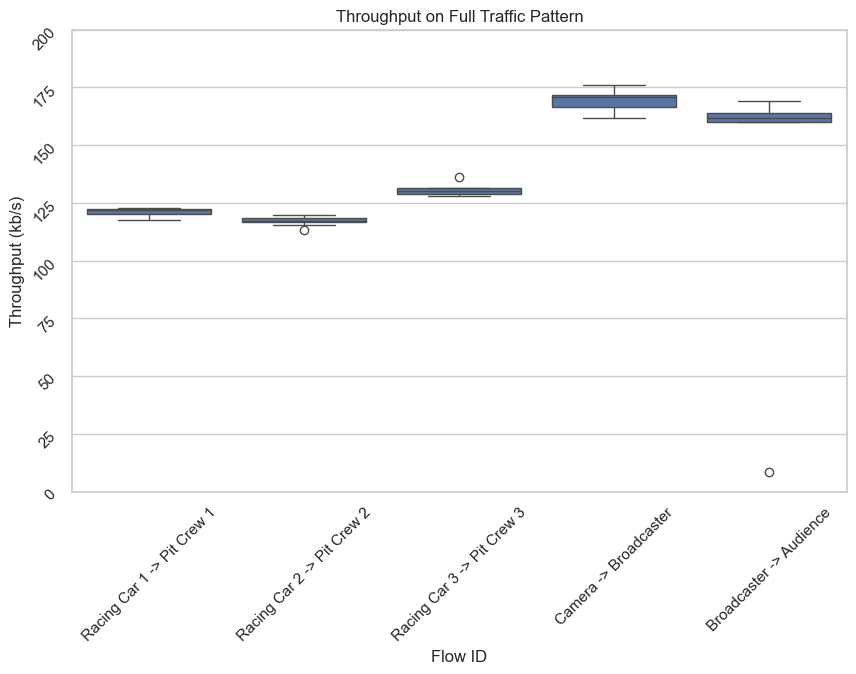

In [30]:
import matplotlib.pyplot as plt

# Load the CSV file
merged_df = pd.read_csv('private-t-g-plot.csv')

# Define flow descriptions
flow_descriptions = {
    1: 'Racing Car 1 -> Pit Crew 1',
    2: 'Racing Car 2 -> Pit Crew 2',
    3: 'Racing Car 3 -> Pit Crew 3',
    7: 'Camera -> Broadcaster',
    8: 'Broadcaster -> Audience'
}

# Filter the data for flow IDs 1, 2, 3, 7, and 8
filtered_data = merged_df[merged_df['FlowID'].isin([1, 2, 3, 7, 8])].copy()

# Convert Throughput to kilobytes (KB/s)
filtered_data['Throughput'] = filtered_data['Throughput'] / 1000

# Create two figures, one for Full traffic and one for Light traffic
full_traffic_data = filtered_data[filtered_data['traffic'] == 'Full'].copy()
light_traffic_data = filtered_data[filtered_data['traffic'] == 'Light'].copy()

# Map Flow IDs to descriptions
full_traffic_data.loc[:, 'FlowDescription'] = full_traffic_data['FlowID'].map(flow_descriptions)
light_traffic_data.loc[:, 'FlowDescription'] = light_traffic_data['FlowID'].map(flow_descriptions)

# Create the plot for full traffic data
plt.figure(figsize=(10, 6))
plot = sns.boxplot(data=full_traffic_data, x='FlowDescription', y='Throughput')

plot.set_xlabel('Flow ID')
plot.set_ylabel('Throughput (kb/s)')
plot.set_title('Throughput on Full Traffic Pattern')
# Optional: Set y-axis limit
plot.set_ylim(0, 200)

plot.tick_params(labelrotation=45)



After that, we can plot the light traffic pattern to check the differences

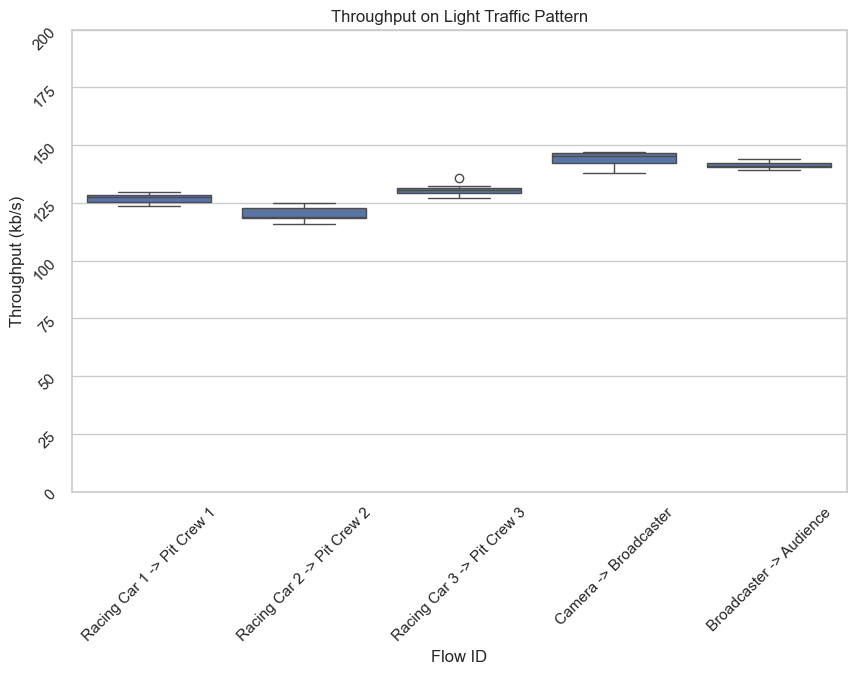

In [31]:
import matplotlib.pyplot as plt
# Create the plot for full traffic data
plt.figure(figsize=(10, 6))

plot = sns.boxplot(data=light_traffic_data, x='FlowDescription', y='Throughput')

# Optional: Set y-axis limit
plot.set_ylim(0, 200)

plot.set_xlabel('Flow ID')
plot.set_ylabel('Throughput (kb/s)')
plot.set_title('Throughput on Light Traffic Pattern')
# Optional: Set y-axis limit
plot.set_ylim(0, 200)

plot.tick_params(labelrotation=45)


In [3]:
import pandas as pd

# Load the data from the CSV file
data = pd.read_csv('private-t-g-plot.csv')

# Filter the data based on FlowID
plot_data = data[data["FlowID"].isin([1, 2, 3, 7, 8])]

# Group by 'FlowID' and aggregate 'Throughput' with mean, min, max, and median
plot_data = plot_data.groupby('FlowID').agg({
    'Throughput': ['mean', 'min', 'max', 'median']
})

# Flatten the multi-level column index and rename columns
plot_data.columns = ['_'.join(col).strip() for col in plot_data.columns.values]

# Reset index to ensure 'FlowID' is a column in the DataFrame
plot_data.reset_index(inplace=True)

# Display the resulting DataFrame
print(plot_data)


   FlowID  Throughput_mean  Throughput_min  Throughput_max  Throughput_median
0       1    123888.589295   117621.878604   129817.481056      123219.155295
1       2    118652.504254   113245.535378   125058.973413      118276.554590
2       3    130640.367588   127074.884218   136200.839828      130279.217352
3       7    156795.615407   138022.973493   176064.226706      154295.421979
4       8    142480.294575     8559.821822   169046.010574      143543.595437


(0.0, 200.0)

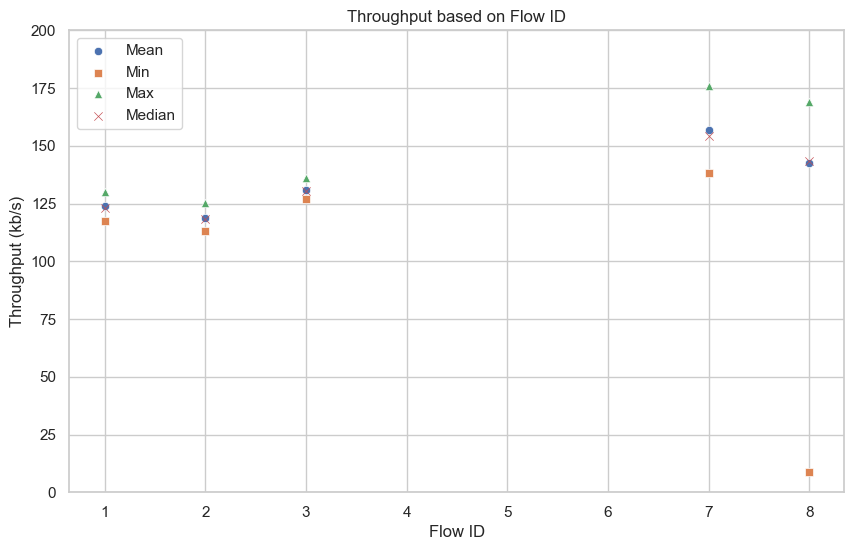

In [38]:

import matplotlib.pyplot as plt

# Load the data from the CSV file
data = pd.read_csv('private-t-g-plot.csv')

# Filter the data based on FlowID
plot_data = data[data["FlowID"].isin([1, 2, 3, 7, 8])]

# Group by 'FlowID' and aggregate 'Throughput' with mean, min, max, and median
plot_data = plot_data.groupby('FlowID').agg({
    'Throughput': ['mean', 'min', 'max', 'median']
})

# Flatten the multi-level column index and rename columns
plot_data.columns = ['_'.join(col).strip() for col in plot_data.columns.values]

# Reset index to ensure 'FlowID' is a column in the DataFrame
plot_data.reset_index(inplace=True)

# Convert throughput to kilobytes per second
plot_data['Throughput_mean'] /= 1000
plot_data['Throughput_min'] /= 1000
plot_data['Throughput_max'] /= 1000
plot_data['Throughput_median'] /= 1000

# Plotting with seaborn
sns.set(style="whitegrid")  # Set the style
plt.figure(figsize=(10, 6))  # Set the figure size

# Plot mean, min, max, and median separately
plt = sns.scatterplot(x='FlowID', y='Throughput_mean', data=plot_data, label='Mean', marker='o')
plt = sns.scatterplot(x='FlowID', y='Throughput_min', data=plot_data, label='Min', marker='s')
plt = sns.scatterplot(x='FlowID', y='Throughput_max', data=plot_data, label='Max', marker='^')
plt = sns.scatterplot(x='FlowID', y='Throughput_median', data=plot_data, label='Median', marker='x')

# Set labels and title
plt.set_xlabel('Flow ID')
plt.set_ylabel('Throughput (kb/s)')
plt.set_title('Throughput based on Flow ID')
plt.set_ylim(0, 200)





The following cells are only warehouse

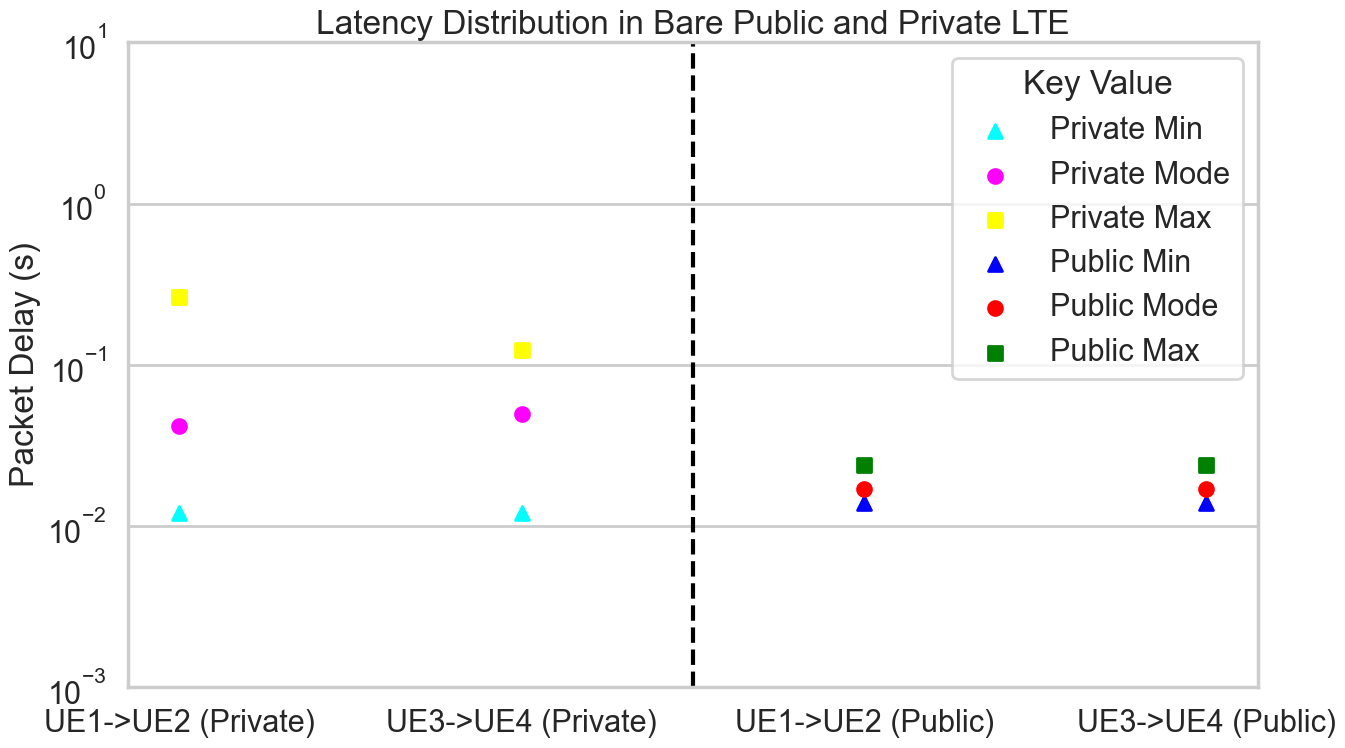

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define a function to process the data
def process_data(file_path, label):
    df = pd.read_csv(file_path)
    
    # Define flow descriptions
    flow_descriptions = {
        1: 'UE1->UE2',

        3: 'UE3->UE4',
       
    }

    # Filter the data based on FlowID
    filtered_data = df[df['FlowID'].isin(flow_descriptions.keys())].copy()

    # Map FlowID to Flow Description
    filtered_data['Flow Description'] = filtered_data['FlowID'].map(flow_descriptions)

    # Calculate min, max, and mode for each flow
    stats_data = []
    for flow_id, flow_desc in flow_descriptions.items():
        flow_data = filtered_data[filtered_data['FlowID'] == flow_id]

        if not flow_data.empty:
            min_delay = flow_data['Start'].min()
            max_delay = flow_data['Start'].max()
            
            # Calculate mode based on the highest count
            mode_delay = flow_data.loc[flow_data['Count'].idxmax(), 'Start']
            
            stats_data.append({
                'Flow Description': f'{flow_desc} ({label})',
                'Min': min_delay,
                'Max': max_delay,
                'Mode': mode_delay,
                'Label': label
            })

    return pd.DataFrame(stats_data)

# Process both datasets
public_stats = process_data('ideal-public-delay.csv','Public')
private_stats = process_data('ideal-private-delay.csv','Private')

# Combine both datasets
combined_stats = pd.concat([private_stats, public_stats])

# Create the plot
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")
sns.set_context('poster')

# Plot min, max, and mode for both datasets
for idx, row in combined_stats.iterrows():
    flow_desc = row['Flow Description']
    min_delay = row['Min']
    max_delay = row['Max']
    mode_delay = row['Mode']
    label = row['Label']
    
    if label == 'Public':
        plt.scatter([flow_desc], [min_delay], color='blue', marker='^', s=100, label='Public Min' if idx == 0 else "")
        plt.scatter([flow_desc], [mode_delay], color='red', marker='o', s=100, label='Public Mode' if idx == 0 else "")
        plt.scatter([flow_desc], [max_delay], color='green', marker='s', s=100, label='Public Max' if idx == 0 else "")
    else:
        plt.scatter([flow_desc], [min_delay], color='cyan', marker='^', s=100, label='Private Min' if idx == 0 else "")
        plt.scatter([flow_desc], [mode_delay], color='magenta', marker='o', s=100, label='Private Mode' if idx == 0 else "")
        plt.scatter([flow_desc], [max_delay], color='yellow', marker='s', s=100, label='Private Max' if idx == 0 else "")

# Customize plot

plt.ylabel('Packet Delay (s)')
plt.ylim(1/1000,10)  # Adjust the y-axis limit as needed
plt.yscale("log")# Adjust the y-axis limit as needed
plt.title('Latency Distribution in Bare Public and Private LTE')
plt.xticks(rotation=0)
plt.grid(axis='x')
plt.legend(title='Key Value', loc='upper right')

# Add a central vertical line
num_categories = len(combined_stats['Flow Description'].unique()) // 2
plt.axvline(x=num_categories - 0.5, color='black', linestyle='--')

# Show plot
plt.tight_layout()
#plt.show()
plt.savefig('ideal-delay.png',bbox_inches='tight')


In [ ]:

plt=sns.catplot(data=data[data['traffic'] == 'Light'], x='FlowID', y='Start', kind='strip', height=5, aspect=2)

plt.set(ylim=(0, 0.5))


In [ ]:
data = merged_df.copy()
data['FlowID'] 
data = data[data.FlowID.isin([1,2,3,7,8])]
data['Throughput'] = data['Throughput']/1000
plt = sns.catplot(data, x='FlowID', y='Throughput',kind='box',errorbar=('ci',100),)
plt.set(ylim=(0, 400))